<a href="https://colab.research.google.com/github/Sampritisahoo/UNIFIED-MENTOR_DATA-SCIENCE/blob/main/Unified_Mentor_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colorado Motor Vehicle Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [17]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('colorado_motor_vehicle_sales.csv')

In [27]:
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
def perform_eda(df):
  print(f"Shape of the DataFrame: {df.shape}\n")
  print(f"Data types:\n{df.dtypes}\n")
  print(f"Missing values:\n{df.isnull().sum()}\n")
  print(f"Summary statistics:\n{df.describe()}\n")

  for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
      plt.figure(figsize=(6, 4))
      sns.histplot(data=df, x=column, kde=True)
      plt.title(f"Histogram of {column}")
      plt.show()

    elif df[column].dtype == 'object':
      plt.figure(figsize=(6, 4))
      sns.countplot(data=df, x=column)
      plt.title(f"Bar plot of {column}")
      plt.xticks(rotation=90)
      plt.show()

Shape of the DataFrame: (501, 4)

Data types:
year        int64
quarter     int64
county     object
sales       int64
dtype: object

Missing values:
year       0
quarter    0
county     0
sales      0
dtype: int64

Summary statistics:
              year     quarter         sales
count   501.000000  501.000000  5.010000e+02
mean   2011.570858    2.502994  1.760585e+08
std       2.266599    1.120041  1.642055e+08
min    2008.000000    1.000000  6.274000e+06
25%    2010.000000    2.000000  6.148200e+07
50%    2012.000000    3.000000  1.385820e+08
75%    2014.000000    4.000000  2.241580e+08
max    2015.000000    4.000000  9.169100e+08



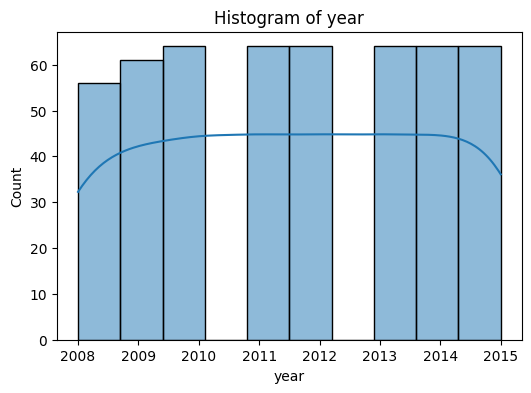

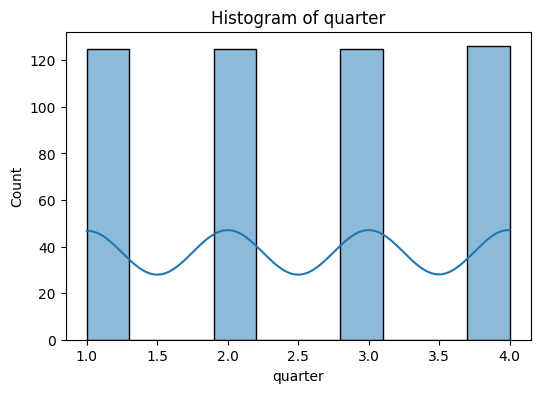

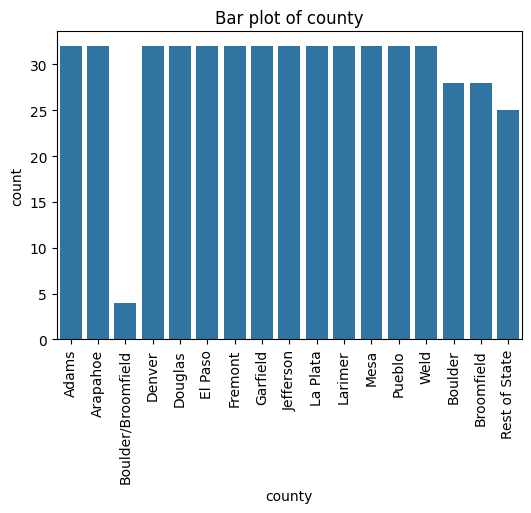

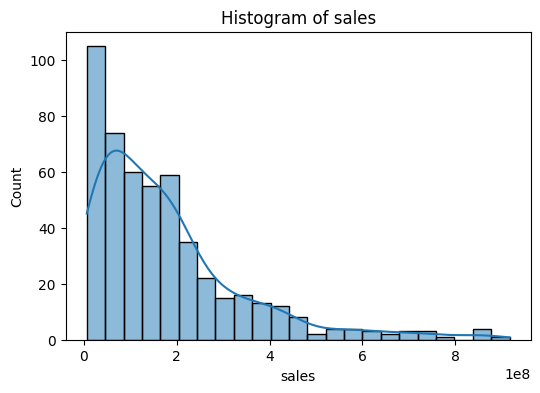

In [29]:
perform_eda(df)

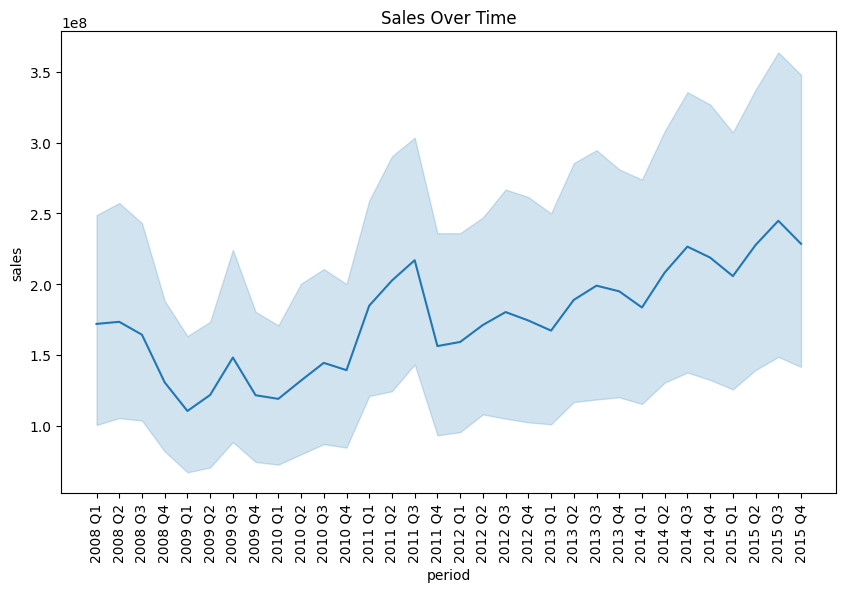

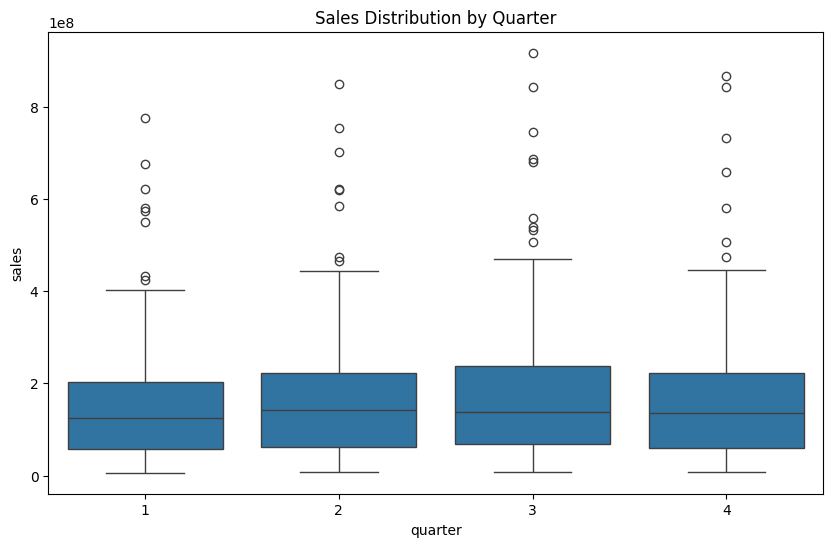

In [31]:
df['period'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='period', y='sales')
plt.title('Sales Over Time')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='quarter', y='sales')
plt.title('Sales Distribution by Quarter')
plt.show()

In [33]:
import ipywidgets as widgets

def plot_sales_by_county(df, year, quarter):
  filtered_df = df[(df['year'] == year) & (df['quarter'] == quarter)]
  county_sales = filtered_df.groupby('county')['sales'].sum().reset_index()
  county_sales_sorted = county_sales.sort_values('sales', ascending=False)
  plt.figure(figsize=(12, 6))
  sns.barplot(data=county_sales_sorted, x='county', y='sales', palette='viridis')
  plt.title(f'Sales by County for {year} Q{quarter}')
  plt.xticks(rotation=90)
  plt.ylabel('Total Sales')
  plt.xlabel('County')
  plt.show()
  year_widget = widgets.IntSlider(min=df['year'].min(),
  max=df['year'].max(), step=1, description='Year:')
  quarter_widget = widgets.IntSlider(min=df['quarter'].min(), max=df['quarter'].max(), step=1, description='Quarter:')
  widgets.interact(lambda year, quarter: plot_sales_by_county(df, year, quarter), year=year_widget, quarter=quarter_widget)
  Year: 2008
  Quarter: 1

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
df['county'] = df['county'].astype('category').cat.codes
X = df[['year', 'quarter', 'county']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 20402876.97387048


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 19981856.206187755
